BT22CSA026 MUHAMMED FAZL OMAR

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

ds = tfds.load('mnist', split='train', shuffle_files=True)
ds

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
import pandas as pd

df = tfds.as_dataframe(ds)

In [ ]:
df.head(10)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
ds_train, ds_info = tfds.load('mnist', split='train', shuffle_files=True, with_info=True)
print("Total number of samples in the dataset:", ds_info.splits['train'].num_examples)

# Convert dataset to numpy arrays
samples = []
for sample in ds_train:
    image = sample['image'].numpy()
    label = sample['label'].numpy()
    samples.append((image, label))

# Split the dataset into training and validation sets using train_test_split
train_samples, val_samples = train_test_split(samples, test_size=0.15, random_state=42)

# Extract images and labels from the split samples
train_images, train_labels = zip(*train_samples)
val_images, val_labels = zip(*val_samples)

# Convert images and labels to TensorFlow tensors
train_images = tf.convert_to_tensor(train_images, dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int32)
val_images = tf.convert_to_tensor(val_images, dtype=tf.float32)
val_labels = tf.convert_to_tensor(val_labels, dtype=tf.int32)

# Preprocess the data
train_images /= 255.0
val_images /= 255.0

len(val_images)

Total number of samples in the dataset: 60000


9000

Epoch 1/10
1594/1594 [==============================] - 50s 31ms/step - loss: 0.1637 - accuracy: 0.9498 - val_loss: 0.0697 - val_accuracy: 0.9793
Epoch 2/10
1594/1594 [==============================] - 47s 30ms/step - loss: 0.0500 - accuracy: 0.9839 - val_loss: 0.0465 - val_accuracy: 0.9853
Epoch 3/10
1594/1594 [==============================] - 45s 28ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0449 - val_accuracy: 0.9871
Epoch 4/10
1594/1594 [==============================] - 49s 30ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0340 - val_accuracy: 0.9899
Epoch 5/10
1594/1594 [==============================] - 45s 28ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0423 - val_accuracy: 0.9892
Epoch 6/10
1594/1594 [==============================] - 47s 29ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0584 - val_accuracy: 0.9846
Epoch 7/10
1594/1594 [==============================] - 48s 30ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0361 -

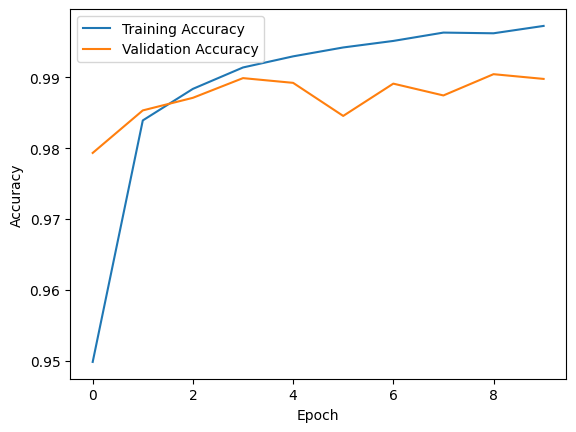

In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Save the history
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)

# Plot training vs validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Load the MNIST test dataset
ds_test = tfds.load('mnist', split='test', shuffle_files=False)

# Preprocess the data
def preprocess_data(sample):
    image = tf.cast(sample['image'], tf.float32) / 255.0
    label = sample['label']
    return image, label

ds_test = ds_test.map(preprocess_data)

# Define a function to extract images and labels
def extract_images_and_labels(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(image)
        labels.append(label)
    return tf.convert_to_tensor(images), tf.convert_to_tensor(labels)

# Extract test images and labels
test_images, test_labels = extract_images_and_labels(ds_test)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 4s 12ms/step - loss: 0.0405 - accuracy: 0.9903
Test Accuracy: 0.9902999997138977
